# Explore here

# ÍNDICE

1. [CARGA DE DATOS Y PRIMERAS IMPRESIONES](#1-carga-de-datos-y-primeras-impresiones)  
2. [LIMPIEZA Y TRATAMIENTO DE NULOS](#2-limpieza-y-tratamiento-de-nulos)  
3. [ANÁLISIS UNIVARIADO (UNIVARIANTE)](#3-análisis-univariado-univariante)  
   - [3.1: Categóricas](#31-categóricas)  
   - [3.2: Numéricas](#32-numéricas)  
4. [ANÁLISIS BIVARIADO O MULTIVARIANTE](#4-análisis-bivariado-o-multivariante)  
   - [4.1 Numérico-numérico](#41-numérico-numérico)  
   - [4.2 Categórico-categórico](#42-categórico-categórico)  
5. [ANÁLISIS DE CORRELACIONES](#5-análisis-de-correlaciones)  
6. [OUTLIERS (VALORES ATÍPICOS)](#6-outliers-valores-atípicos)  
7. [FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"](#7-feature-engineering-escalado-y-normalización-de-valores)  
   - [7.1 Normalización](#71-normalización)  
   - [7.2 Escalado mín-max](#72-escalado-mín-max)
8. [MODELO DE REGRESIÓN LOGÍSTICA](#8-modelo-de-regresión-logística)
9. [OPTIMIZACIÓN DE HIPERPARÁMETROS](#9-optimización-de-hiperparámetros)
   - [9.1 Grid search](#91-grid-search)
   - [9.2 Random search](#92-random-search)


## 1. CARGA DE DATOS Y PRIMERAS IMPRESIONES ##

In [3]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
total_data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


In [4]:
total_data.shape

(41188, 21)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 2. LIMPIEZA Y TRATAMIENTO DE NULOS ##

In [6]:
total_data.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes


In [7]:
total_data.drop(["contact", "month", "day_of_week","pdays","previous"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


Del dataset original se ha decidido eliminar las columnas: contact, month, day_of_week, pdays y previous. Esto es debido a que tras analizar el dataset completo y el objetivo del EDA que sería prever la probabilidad de que un cliente contrate un nuevo depósito a largo plazo, dichas columnas (que se explican en el siguiente markdown) no se consideran relevantes para dicho estudio. Es decir el tipo de comunicación de contacto con el cliente, último mes que fue contactado, día de la semana que fue contactado, número de días transcurridos desde el último contacto y número de contactos realizados en la anterior campaña. Todo el resto de columnas se han dejado ya que hay dudas sobre su posible uso a futuro en el entrenamiento de ML con el objetivo expresado previamente.

In [8]:
total_data.shape

(41188, 16)

Las columnas del previo dataset ORIGINALES (21) son las siguientes:


    age. Edad del cliente (numérico)
    job. Tipo de trabajo (categórico)
    marital. Estado civil (categórico)
    education. Nivel de educación (categórico)
    default. ¿Tiene crédito actualmente? (categórico)
    housing. ¿Tiene un préstamo de vivienda? (categórico)
    loan. ¿Tiene un préstamo personal? (categórico)
    contact. Tipo de comunicación de contacto (categórico)
    month. Último mes en el que se le ha contactado (categórico)
    day_of_week. Último día en el que se le ha contactado (categórico)
    duration. Duración del contacto previo en segundos (numérico)
    campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
    pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
    previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
    poutcome. Resultado de la campaña de marketing anterior (categórico)
    emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
    cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
    cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
    euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
    nr.employed. Número de empleados. Indicador trimestral (numérico)
    y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

    Finalmente nos hemos quedado con 16 de ellas, eliminando sobre todo aquellas que consideramos que no son relevantes para el EDA actual, cuyo objetivo es identificar potenciales clientes que contratarían un depósito a largo plazo.


# 3. ANÁLISIS UNIVARIADO (UNIVARIANTE)

3.1 CATEGÓRICAS:

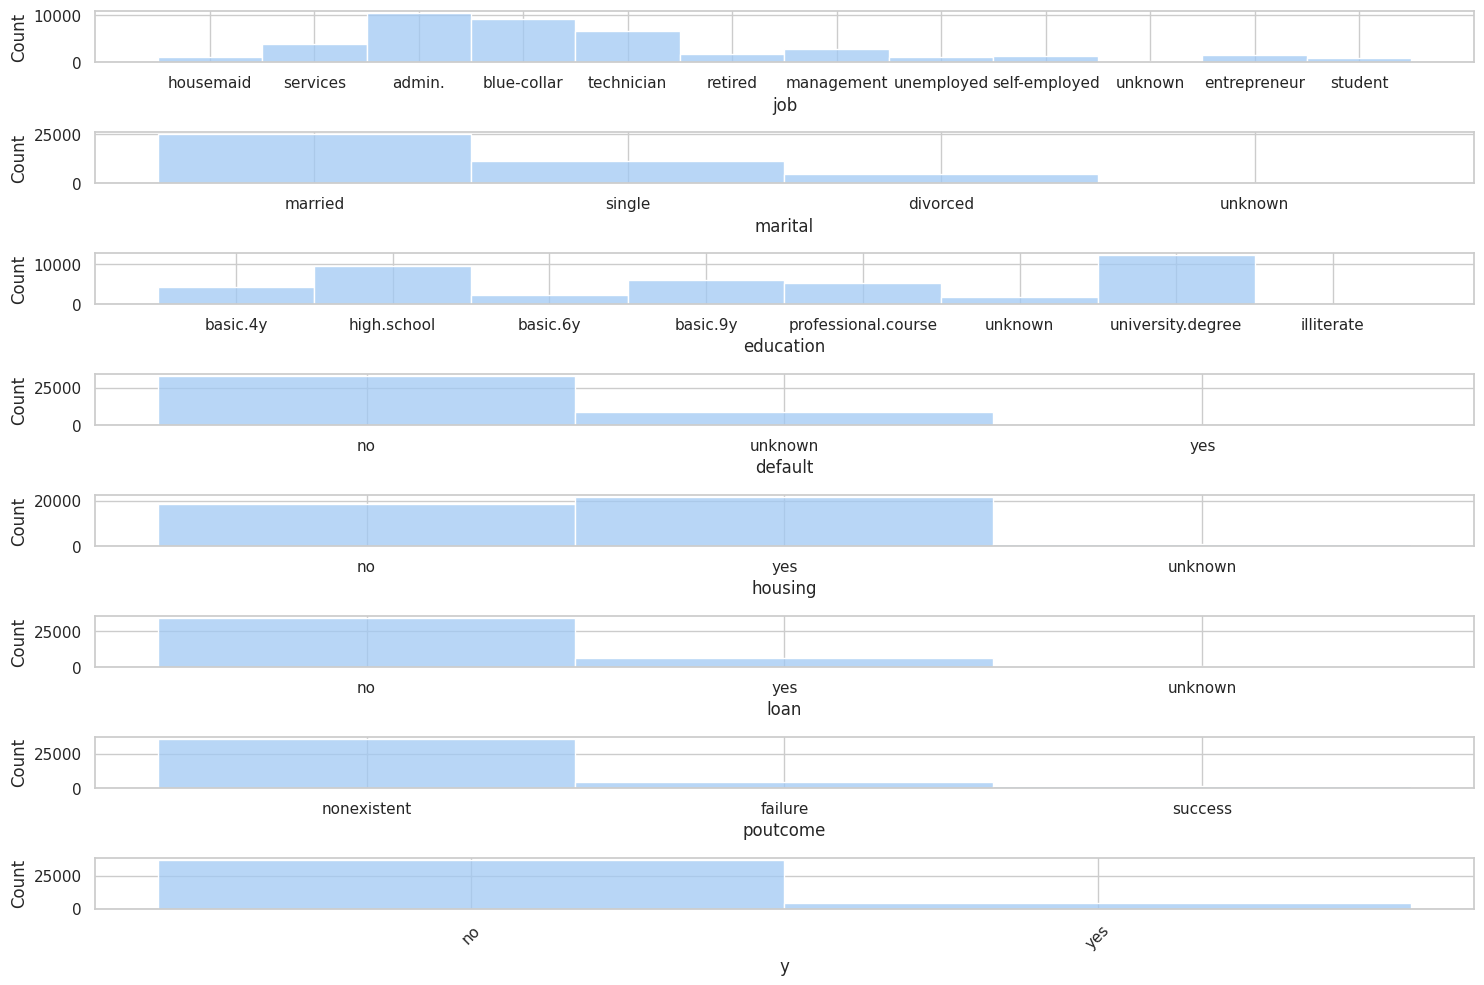

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(8, figsize=(15, 10))

sns.histplot(ax = axis[0], data = total_data, x = "job")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1], data = total_data, x = "marital")
plt.xticks(rotation=45)
sns.histplot(ax = axis[2], data = total_data, x = "education")
plt.xticks(rotation=45)
sns.histplot(ax = axis[3], data = total_data, x = "default")
plt.xticks(rotation=45)
sns.histplot(ax = axis[4], data = total_data, x = "housing")
plt.xticks(rotation=45)
sns.histplot(ax = axis[5], data = total_data, x = "loan")
plt.xticks(rotation=45)
sns.histplot(ax = axis[6], data = total_data, x = "poutcome")
plt.xticks(rotation=45)
sns.histplot(ax = axis[7], data = total_data, x = "y")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


Como se puede observar, se ha llevado a cabo un análisis como histogramas de las 8 variables numéricas que quedan en el dataset:

Job: En el tipo de empleo de los usuarios del dataset podemos observar 3 pilares básicos que se diferencian claramente del resto de tipos de empleo, en primer lugar encontramos administrativos/as, en segundo lugar empelados "blue collar" (manuales o técnicos) y en tercer lugar técnicos "in se". Si bien observamos en el eje y otros tipos de empleo (autónomos, jubilados, estudiantes, amos/as de casa, otros), estos tres mencionados anteriormente cobrarán el mayor peso (no sabemos aún a nivel de calidad, pero sí de cantidad) en el análisis.

Marital: de las 41.176 líneas (clientes) que contiene el dataset, en relación con su estado civil observamos que más del 50% están casados/as. En segundo lugar, un poco menos de la mitad de éstos, serían solteros/as, y en bastante menor proporción separados/as. Encontraríamos también la opción de estado civil desconocido que a nivel de cantidad no parece actualmente relevante.

Education: En relación a los estudios de las aproximadamente 42K personas que componen el dataset, dividiría este gráfico en 3 partes. En la primera llama la atención el mayor peso de graduados universitarios en mayor proporción, seguidos de los graduados de educación secundaria. En segundo lugar, en menor peso pero similares cantidades, encontraríamos a los basic y9 y profesional course, entiendiendo que son graduados escolares y estudiantes de grados superiores. En tercer bloque mencionaría basic 4y, basic 6y y desconocido. Así pues dichos bloques expuestos anteriormente van de mayor a menor en cantidad de usuarios del banco. Finalmente haría falta remarcar que en última posición pero con unas ínfimas cantidades nos aparece como categoría "illiterate" (sin ningún tipo de estudio).

Default: esta columna nos indica si el usuario tiene actualmente un crédito. En este caso podemos decir con claridad que más de 30K usuarios de los 42K del dataset NO tienen un crédito actualmente. Esto puede ser interesante para el posterior análisis. Unos 5K usuarios aparece como estado "desconocido" y finalmente, como ocurría anteriormente con la categoría "illiterate", en este caso ocurre con la categoría de "sí", siendo ínfima la cantidad de análisis de la misma en este gráfico.

Housing: Indica si el usuario tiene un préstamo de vivienda en este caso. Así pues, en el gráfico podemos observar que, si bien "sí" es la categoría con más peso, la sigue muy de cerca la categoría "no". Es decir, de estos 42K usuarios del banco, este dato sería (no exactamente) pero muy de cerca un 50-50.

Loan: Indica si el usuario tiene un préstamo personal. En este gráfico pues, observamos que un gran peso recae en la categoría "no", dejando a la categoría "sí" y "desconocido" con un peso muy bajo. Así pues, como en la columna "default" esto puede resultarnos muy interesante para el posterior análisis más complejo de los datos.

Poutcome: Resultado de la campaña de marketing llevada a cabo con anterioridad por el banco. En este caso vamos a recalcar la categoría más baja, con cantidades mínimas, que se correspondería con "sucess" es decir, que con dicho usuario la campaña funcionó, seguida por "failure" o fracaso. De este modo, como categoría con un peso porcentualmente ganador estaría la inexistencia de resultado de la campaña anterior con el usuario, dato interesante si se coteja con los previamente comentados.

Y: Nuestro target, si el cliente contrata depósito a largo plazo o no. En este caso, siendo las opciones posible sí y no, observamos que menos de 5K usuarios de los 42K del dataset la respuesta es sí, dando gran peso (con mucha distancia porcentual) los que no lo contratarían.

3.2 NUMÉRICAS:

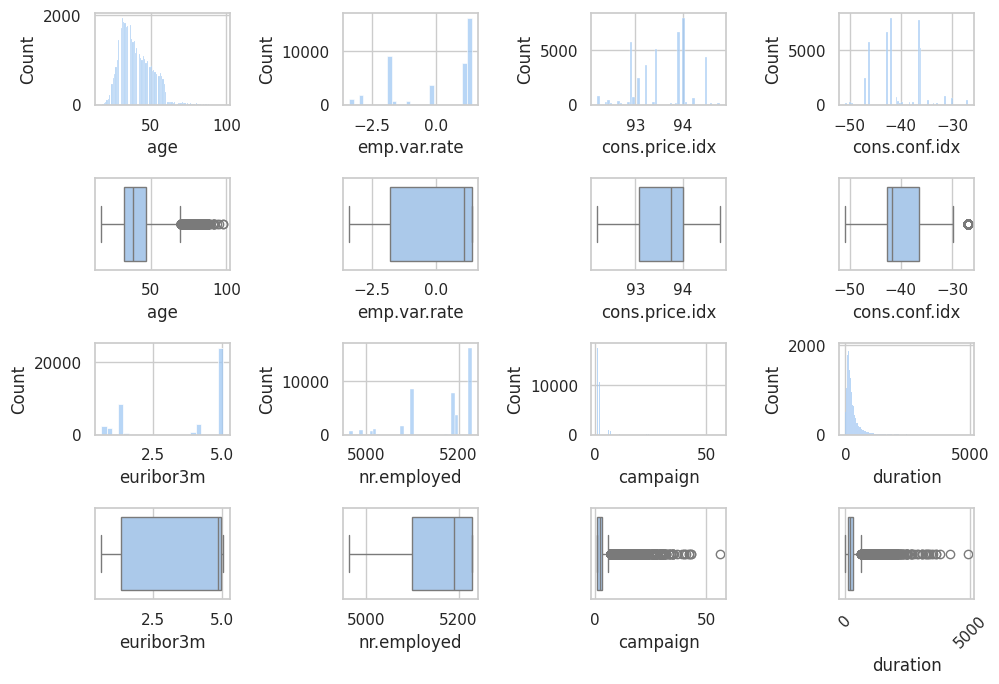

In [10]:
fig, axis = plt.subplots(4, 4, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[0,2], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[1,2], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[0,3], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[1,3], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[2,0], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[3,0], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[2,1], data = total_data, x = "nr.employed")
sns.boxplot(ax = axis[3,1], data = total_data, x = "nr.employed")
sns.histplot(ax = axis[2,2], data = total_data, x = "campaign")
sns.boxplot(ax = axis[3,2], data = total_data, x = "campaign")
sns.histplot(ax = axis[2,3], data = total_data, x = "duration")
sns.boxplot(ax = axis[3,3], data = total_data, x = "duration")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se puede observar, hemos llevado a cabo un análisis  de variantes numéricas del dataset (8 en total), creando con ellas un histograma y un boxplot para cada una de ellas:

- Age: Edad de los usuarios del banco.
Observamos que la mayoría de usuarios se encuentran entre los 20-50 años y el botplot denota unos cuartiles equilibrados de estos datos. Pese a esto hay outliers a mayores edades a analizar y decidir posteriormente si son interesantes en el actual EDA.


- Emp.var.rate: Tasa de variación del empleo (trimestral).
No se observan outliers, podemos decir pues que los datos están equilibrados en esta categoría numérica. 


- Cons.price.idx: Índice de precios al consumidor.
No se observan outliers, podemos decir pues que los datos están equilibrados en esta categoría numérica. 



- Cons.conf.idx: Índice de confianza del consumidor.
Si bien generalmente el histograma y el boxplot muestran unos datos dentro de unos baremos equilibrados, se observa un outlier fuera de lo común por debajo de los -30, que analizaremos posteriormente. 



- Euribor3m: Tasa de Euribor 3 meses (indicador diario).
No se observan outliers, podemos decir pues que los datos están equilibrados en esta categoría numérica. 



- Nr.employed: Número de empleados (indicador trimestral).
No se observan outliers, podemos decir pues que los datos están equilibrados en esta categoría numérica. 



- Campaign: Número de contactos realizados durante esta campaña al cliente.
Podemos observar que tanto en este gráfico como en el de duration los resultados son muy similares. Si bien hay unas cifras dentro de un baremo básico en las cifras más bajas, encontramos gran cantidad de outliers a medida que estas aumentan, es decir, a cuanto más número de contactos se realizaron durante esta campaña, más valores atípicos aparecen graficados.


- Duration: Duración del contacto previo en segundos.
Podemos observar que tanto en este gráfico como en el de campaign los resultados son muy similares. Si bien hay unas cifras dentro de un baremo básico en las cifras más bajas, encontramos gran cantidad de outliers a medida que estas aumentan, es decir, a cuanto más duración en segundos del contacto se realizó durante esta campaña, más valores atípicos aparecen graficados.


# 4. ANÁLISIS BIVARIADO O MULTIVARIANTE 

4.1 NUMÉRICO-NUMÉRICO

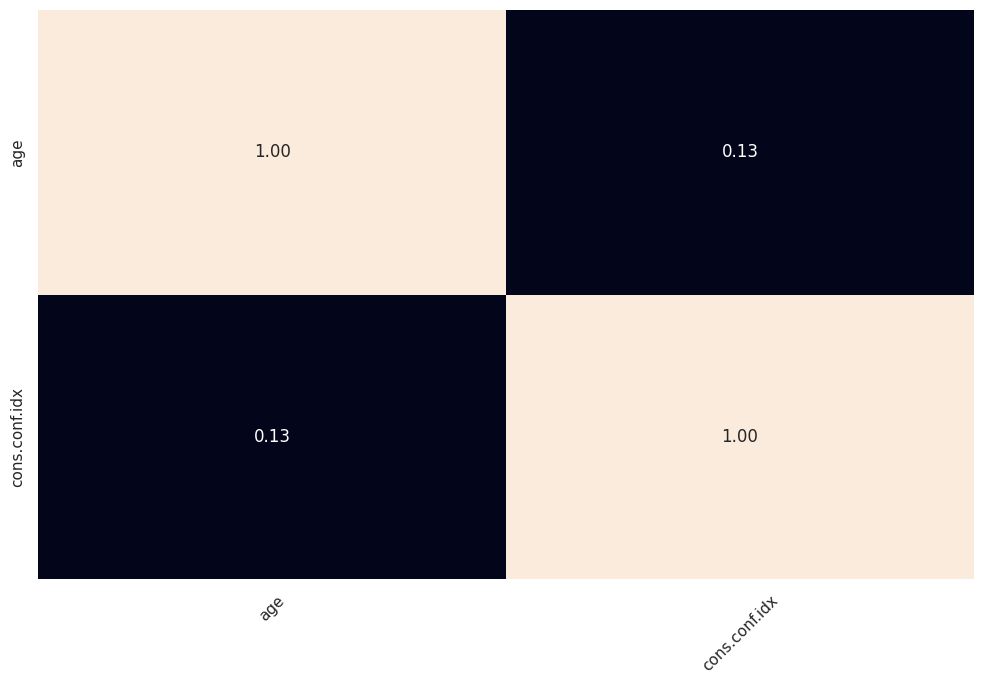

In [11]:

fig, axis = plt.subplots(1,1, figsize = (10, 7))

sns.regplot(data = total_data, x = "cons.conf.idx", y = "age")
sns.heatmap(total_data[["age", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", cbar = False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este caso, y teniendo en cuenta que la cantidad de gráficos en un EDA no estan establecidos, se ha decidido hacer sólo un gráfico de tipo "regplot" multivariante numérico-numérico con las columnas age (edad del usuario del banco) y cons.cond.idx, es decir tasa de confianza del cliente, para ver si existen relaciones entre ambas, ya que se intentó analizar la edad con otras columnas y no se observaron (a priori) grandes correlaciones (que observaremos más adelante con el mapa de correlaciones después de factorizar los datos categóricos que consideremos interesantes en este EDA).

- Así pues, observamos una correlación entre ambas variables de 0.13 (siendo 1 el máximo dato de correlación entre variables). De este modo podemos concluir que existe algún tipo de relación entre la edad del cliente y la tasa de confianza de éste, pero no es significativa (13%).

4.2 CATEGÓRICO-CATEGÓRICO

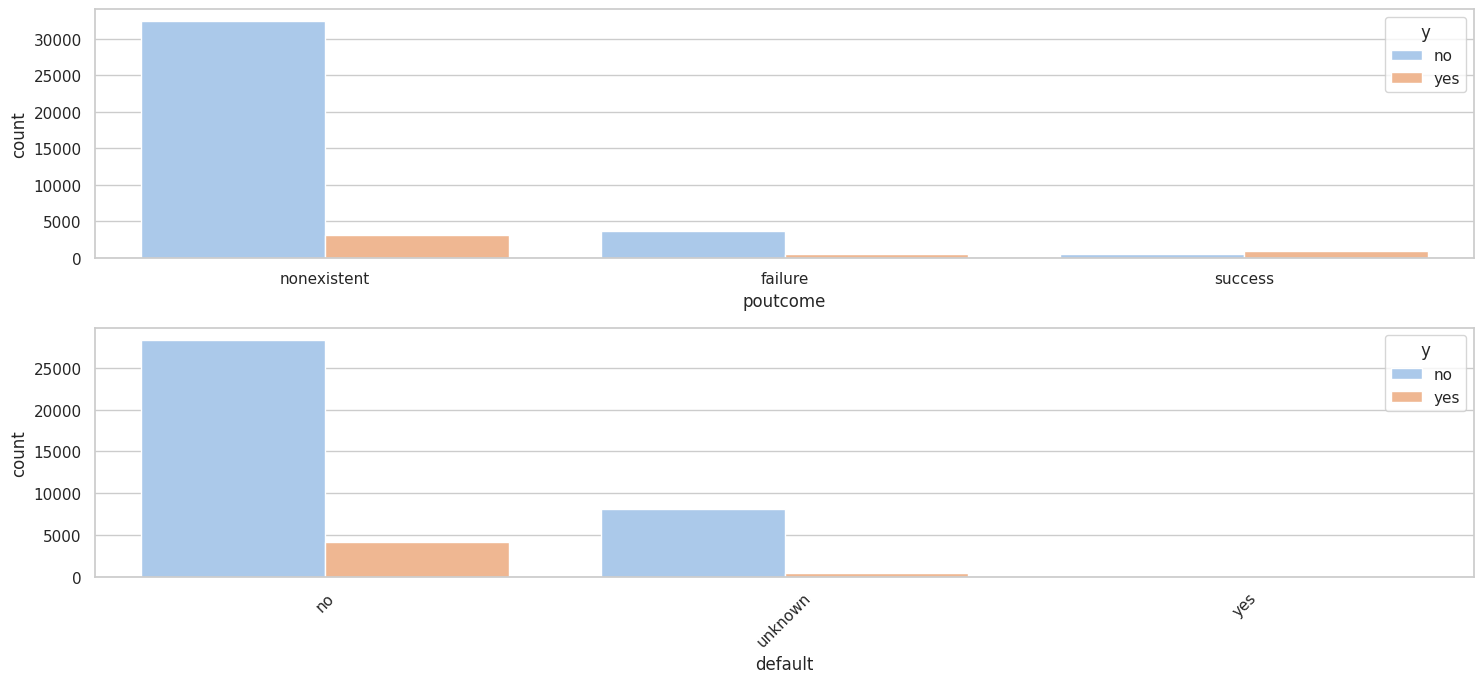

In [12]:
fig, axis = plt.subplots(2, figsize = (15, 7))

sns.countplot(ax = axis[0], data = total_data, x = "poutcome", hue = "y")
plt.xticks(rotation=45)
sns.countplot(ax = axis[1], data = total_data, x = "default", hue = "y")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En el presente caso de gráficos multivariante categórica-categórica se ha decidido crear 2 countplot, ambos cogiendo como base del eje y "Y - nuestro target".

- En el primer gráfico la otra variable elegida ha sido poutcome (resultado de la campaña de marketing llevada a cabo anteriormente por el banco con un usuario): 

Aquí observamos que: 

-> De los usuarios que en la campaña anterior de marketing no tuvieron resultado ante el banco: alrededor de 35K de 42K usuarios no quieren depósito.
-> De los usuarios en los que la campaña anterior de marketing fracasó: casi 5K de los usuarios no quiere depósito.
-> De los usuarios en los que la campaña anterior de marketing fue exitosa para el banco: las cantidades son mínimas, no llegando a los 2K usuarios los que suman sí y no.

Es decir, no parece que haya relación entre campañas pero a priori el usuario parece bastante desinteresado por éstas.



- En el segundo gráfico la otra variable elegida ha sido default (si el usuario tiene actualmente un crédito):

Aquí observamos, en primer lugar, que no existen datos en la opción "sí", es decir, no hay usuarios con créditos por lo que no se puede vincular con la variable target.

-> Es interesante observar como la barra con más peso es la que se encuentra en usuarios que ni tienen crédito ni quieren depósito (+30K). Pese a esto, unos 5K usuarios que no tienen crédito sí que estarían interesados en un depósito. Sería interesante pues correlacionar posteriormente quienes serían este tipo de usuario.

-> De aquellos usuarios de los que desconocemos si tienen actualmente un crédito, aproximadamente 8K no estarían interesados en un depósito, y los que sí lo estarían no llegarían a 1K usuarios.


De este modo, podríamos poner el foco en dos partes:

1. Cuáles son los que no tienen crédito pero sí quieren depósito.
2. Cuáles son los que no tienen créditos ni quieren depósito - por qué, características del usuario, etc.


4.3 Combinaciones de la clase con varias predictoras

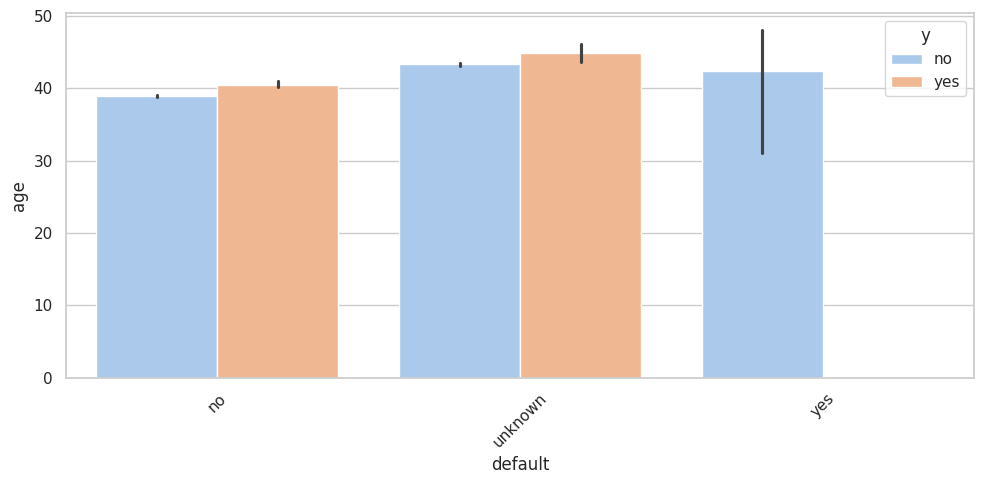

In [13]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_data, x = "default", y = "age", hue = "y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el caso actual de gráfico de barras (barplot) con varias predictoras observamos lo siguiente:


- Eje x: Edad del usuario del banco.
- Eje y: default (si tienen crédito actualmente o no).
- Los colores azul y naranja se corresponden con el target. En azul aquellos que no quieren depósito, en naranja aquellos que sí.

-> De este modo observamos que la media de edad rondaría los 40 años en los usuarios. 
-> De los usuarios que no tienen crédito las cifras entre los que sí y los que no contratarían un depósito son casi 50-50%, lo mismo ocurre con lo usuarios de los que desconocemos si tienen un crédito.
-> Un dato muy claro es que los clientes de créditos no estan interesados en depósito.

# 5. ANÁLISIS DE CORRELACIONES

In [14]:
total_data["y_n"] = pd.factorize(total_data["y"])[0]
total_data[["y_n", "y"]]

,y_n,y
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,0,no
41186,1,yes


In [15]:
y_rules = {row["y"]: row["y_n"] for index, row in total_data[["y_n", "y"]].drop_duplicates().iterrows()}
print(y_rules)

import json

with open("./y_rules.json", "w") as f:
  json.dump(y_rules, f)

with open("./y_rules.json", "r") as f:
    y_rules = json.load(f)
print("2", y_rules)

total_data["y_n"] = total_data["y"].apply(lambda x: y_rules[x])
total_data

{'no': 0, 'yes': 1}
2 {'no': 0, 'yes': 1}


,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1


In [16]:
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data[["default_n", "default"]]

,default_n,default
0,0,no
1,1,unknown
2,0,no
3,0,no
4,0,no
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [17]:
default_rules = {row["default"]: row["default_n"] for index, row in total_data[["default_n", "default"]].drop_duplicates().iterrows()}
print(default_rules)

import json

with open("./default_rules.json", "w") as f:
  json.dump(default_rules, f)

with open("./default_rules.json", "r") as f:
    default_rules = json.load(f)
print("2", default_rules)

total_data["default_n"] = total_data["default"].apply(lambda x: default_rules[x])
total_data

{'no': 0, 'unknown': 1, 'yes': 2}
2 {'no': 0, 'unknown': 1, 'yes': 2}


,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0


In [18]:
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data[["housing_n", "housing"]]

,housing_n,housing
0,0,no
1,0,no
2,1,yes
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,1,yes
41186,0,no


In [19]:
housing_rules = {row["housing"]: row["housing_n"] for index, row in total_data[["housing_n", "housing"]].drop_duplicates().iterrows()}
print(housing_rules)

import json

with open("./housing_rules.json", "w") as f:
  json.dump(housing_rules, f)

with open("./housing_rules.json", "r") as f:
    housing_rules = json.load(f)
print("2", housing_rules)

total_data["housing_n"] = total_data["housing"].apply(lambda x: housing_rules[x])
total_data

{'no': 0, 'yes': 1, 'unknown': 2}
2 {'no': 0, 'yes': 1, 'unknown': 2}


,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,1
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,0


In [20]:
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data[["loan_n", "loan"]]

,loan_n,loan
0,0,no
1,0,no
2,0,no
3,0,no
4,1,yes
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [21]:
loan_rules = {row["loan"]: row["loan_n"] for index, row in total_data[["loan_n", "loan"]].drop_duplicates().iterrows()}
print(loan_rules)

import json

with open("./loan_rules.json", "w") as f:
  json.dump(loan_rules, f)

with open("./loan_rules.json", "r") as f:
    loan_rules = json.load(f)
print("2", loan_rules)

total_data["loan_n"] = total_data["loan"].apply(lambda x: loan_rules[x])
total_data

{'no': 0, 'yes': 1, 'unknown': 2}
2 {'no': 0, 'yes': 1, 'unknown': 2}


,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n,loan_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,0,0


In [22]:
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data[["poutcome_n", "poutcome"]]

,poutcome_n,poutcome
0,0,nonexistent
1,0,nonexistent
2,0,nonexistent
3,0,nonexistent
4,0,nonexistent
...,...,...
41183,0,nonexistent
41184,0,nonexistent
41185,0,nonexistent
41186,0,nonexistent


In [23]:
poutcome_rules = {row["poutcome"]: row["poutcome_n"] for index, row in total_data[["poutcome_n", "poutcome"]].drop_duplicates().iterrows()}
print(poutcome_rules)

import json

with open("./poutcome_rules.json", "w") as f:
  json.dump(poutcome_rules, f)

with open("./poutcome_rules.json", "r") as f:
    poutcome_rules = json.load(f)
print("2", poutcome_rules)

total_data["poutcome_n"] = total_data["poutcome"].apply(lambda x: poutcome_rules[x])
total_data

{'nonexistent': 0, 'failure': 1, 'success': 2}
2 {'nonexistent': 0, 'failure': 1, 'success': 2}


,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n,loan_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,0,0,0


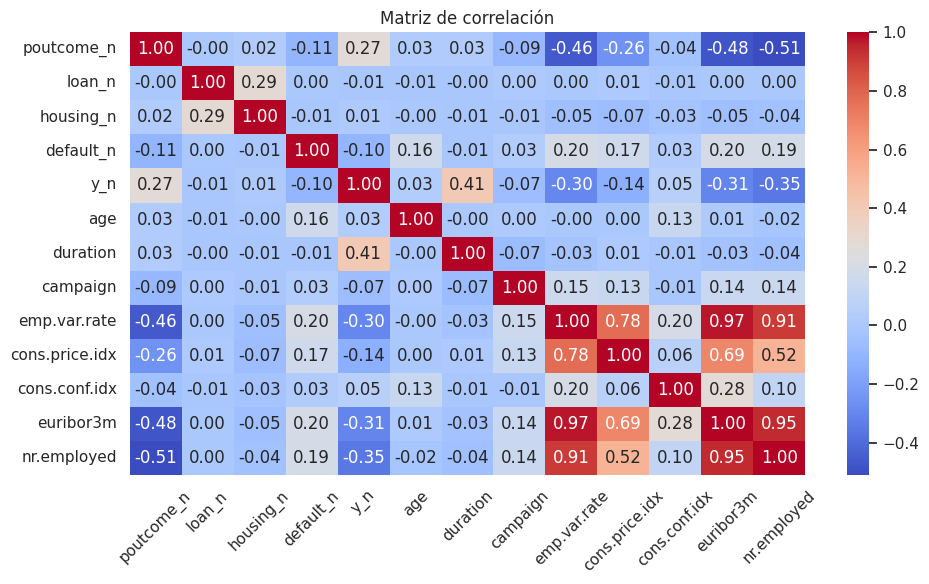

In [24]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["poutcome_n", "loan_n", "housing_n", "default_n", "y_n", "age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En este mapa de calor con las correlaciones entre todas las variables numéricas y aquellas que hemos factorizado para poder correlacionarlas con éstas, podemos observar los siguiente (al ser tantas variables únicamente se expondrán las conclusiones más significativas):

- 0.97 correlación entre euribor3m y emp.var.rate
- 0.95 correlación entre euribor3m y nr.employed
- 0.91 correlación entre nr.employed y emp.var.rate
- 0.78 correlación entre cons.price.idx y emp.var.rate
- 0.69 correlación entre euribor3m y cons.price.idx

De este modo pues podemos decir claramente que hay diversas variables que se correlacionan con otras con gran peso y que no habíamos observado anteriormente:

1. Euribor3m (tasa de Euribor calculada a diario -trimestral-) - índice de interés del mercado europeo.
2. Emp.var.rate (tasa de variación del empleo) - si hay más o menos empleos que antes.
3. Cons.price.idx (índice de precios al consumidor) - medida de inflación.
4. Nr.employed (número de empleados) - en la economía, es un dato puramente de mercado laboral.

Esto nos muestra que los datos con más alta correlación entre sí serían la variación del empleo y tasa de Euribor, y éste a su vez ocn el número de empleados. Por otro lado el número de empleados con la variación del empleo. Ésta última con el índice de precios al consumidor y ésta última de nuevo con la primera, la tasa de Euribor. 

En resumen:

Las correlaciones más importantes y pesadas de este mapa de calor son valores de macroeconomía y de carácter temporal, y es por ello que la correlación es más fuerte entre ellas. Esto será muy interesante para observar si estas condiciones económicas (macroeconómicas) temporales que afectan a los usuarios en un mismo tiempo (que no forma) afectan a su respuesta ante una campaña de marketing, en este caso, de oferta de un depósito a largo plazo.

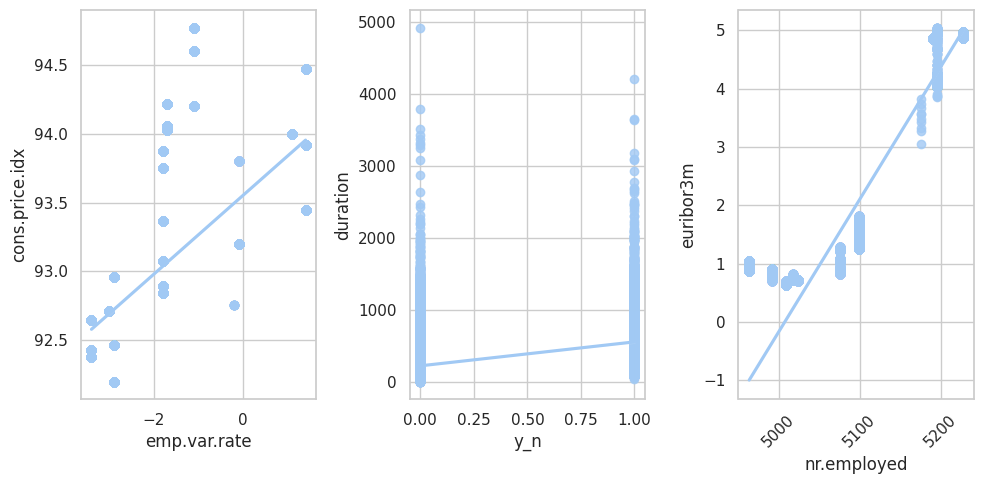

In [25]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)
sns.regplot(ax = axis[0], data = total_data, x = "emp.var.rate", y = "cons.price.idx")
sns.regplot(ax = axis[1], data = total_data, x = "y_n", y = "duration")
sns.regplot(ax = axis[2], data = total_data, x = "nr.employed", y = "euribor3m")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En los 3 gráficos tipo "regplot" que podemos observar arriba se ha decidido comparar las siguientes 2 variables por gráfico para ver si dichas 2 variables estan relacionadas linealmente con un gráfico de dispersión + línea de regresión:

1. Emp.var.rate con cons.price.idx (.0.78 de correlación).
2. Y_n (variable target factorizada) con duration (0.41 de correlación).
3. Nr.employed con euribor3m (.95 de correlación).

Se ha decidido así para, de este modo, ver un gráfico (el número 3) con variables de las que más correlación tenían (como hemos visto en el mapa de calor previamente), y dos más para ver como se observan variables que no tienen correlaciones tan elevadas pero que también se relacionan entre sí.

De este modo, se observan, por gráfico, las conclusiones siguientes:

1. Observamos una línea de regresión bastante ascendente por lo que podemos indicar que hay relación positiva entre ambas variables. Por otro lado, en cuanto a la nube de puntos, podemos observar que, si bien hay puntos muy alejados de la línea de regresión, hay un aura rodeándola siempre, lo cual refuerza esa correlación de 0.78 entre ambas variables. Pese a esto, los puntos no estan extremadamente juntos entre sí, cosa que sí podemos decir de los gráficos 2 y 3.

2.  Observamos una línea de regresión muy ligeramente ascendente, por lo que podemos indicar que hay relación positiva entre ambas variables pero no tanta como para indicar una relación absolutamente directa entre ambas, más bien neutral con algun indicador relacional entre ambas, interesante a analizar si fuera necesario. En relación a la nube de puntos, si bien éstos entre sí sí que se encuentran unidos, no tienen demasiada relación o cercanía con la línea de regresión, lo que refuerza la teoría de que, si bien es cierto que hay algún tipo de vínculo, no es una relación importante.

3. Observamos una línea de regresión MUY ascendente por lo que podemos indicar que hay relación positiva entre ambas variable (que como ya sabemos por el mapa de calor anterior, es de 0.95 y de este modo hemos corroborado esta conclusión). Lo mismo ocurre con la nube de puntos, donde vemos que los puntos entre sí estan muy unidos, y también a la línea de regresión, indicándonos fuerte correlación entre variables.




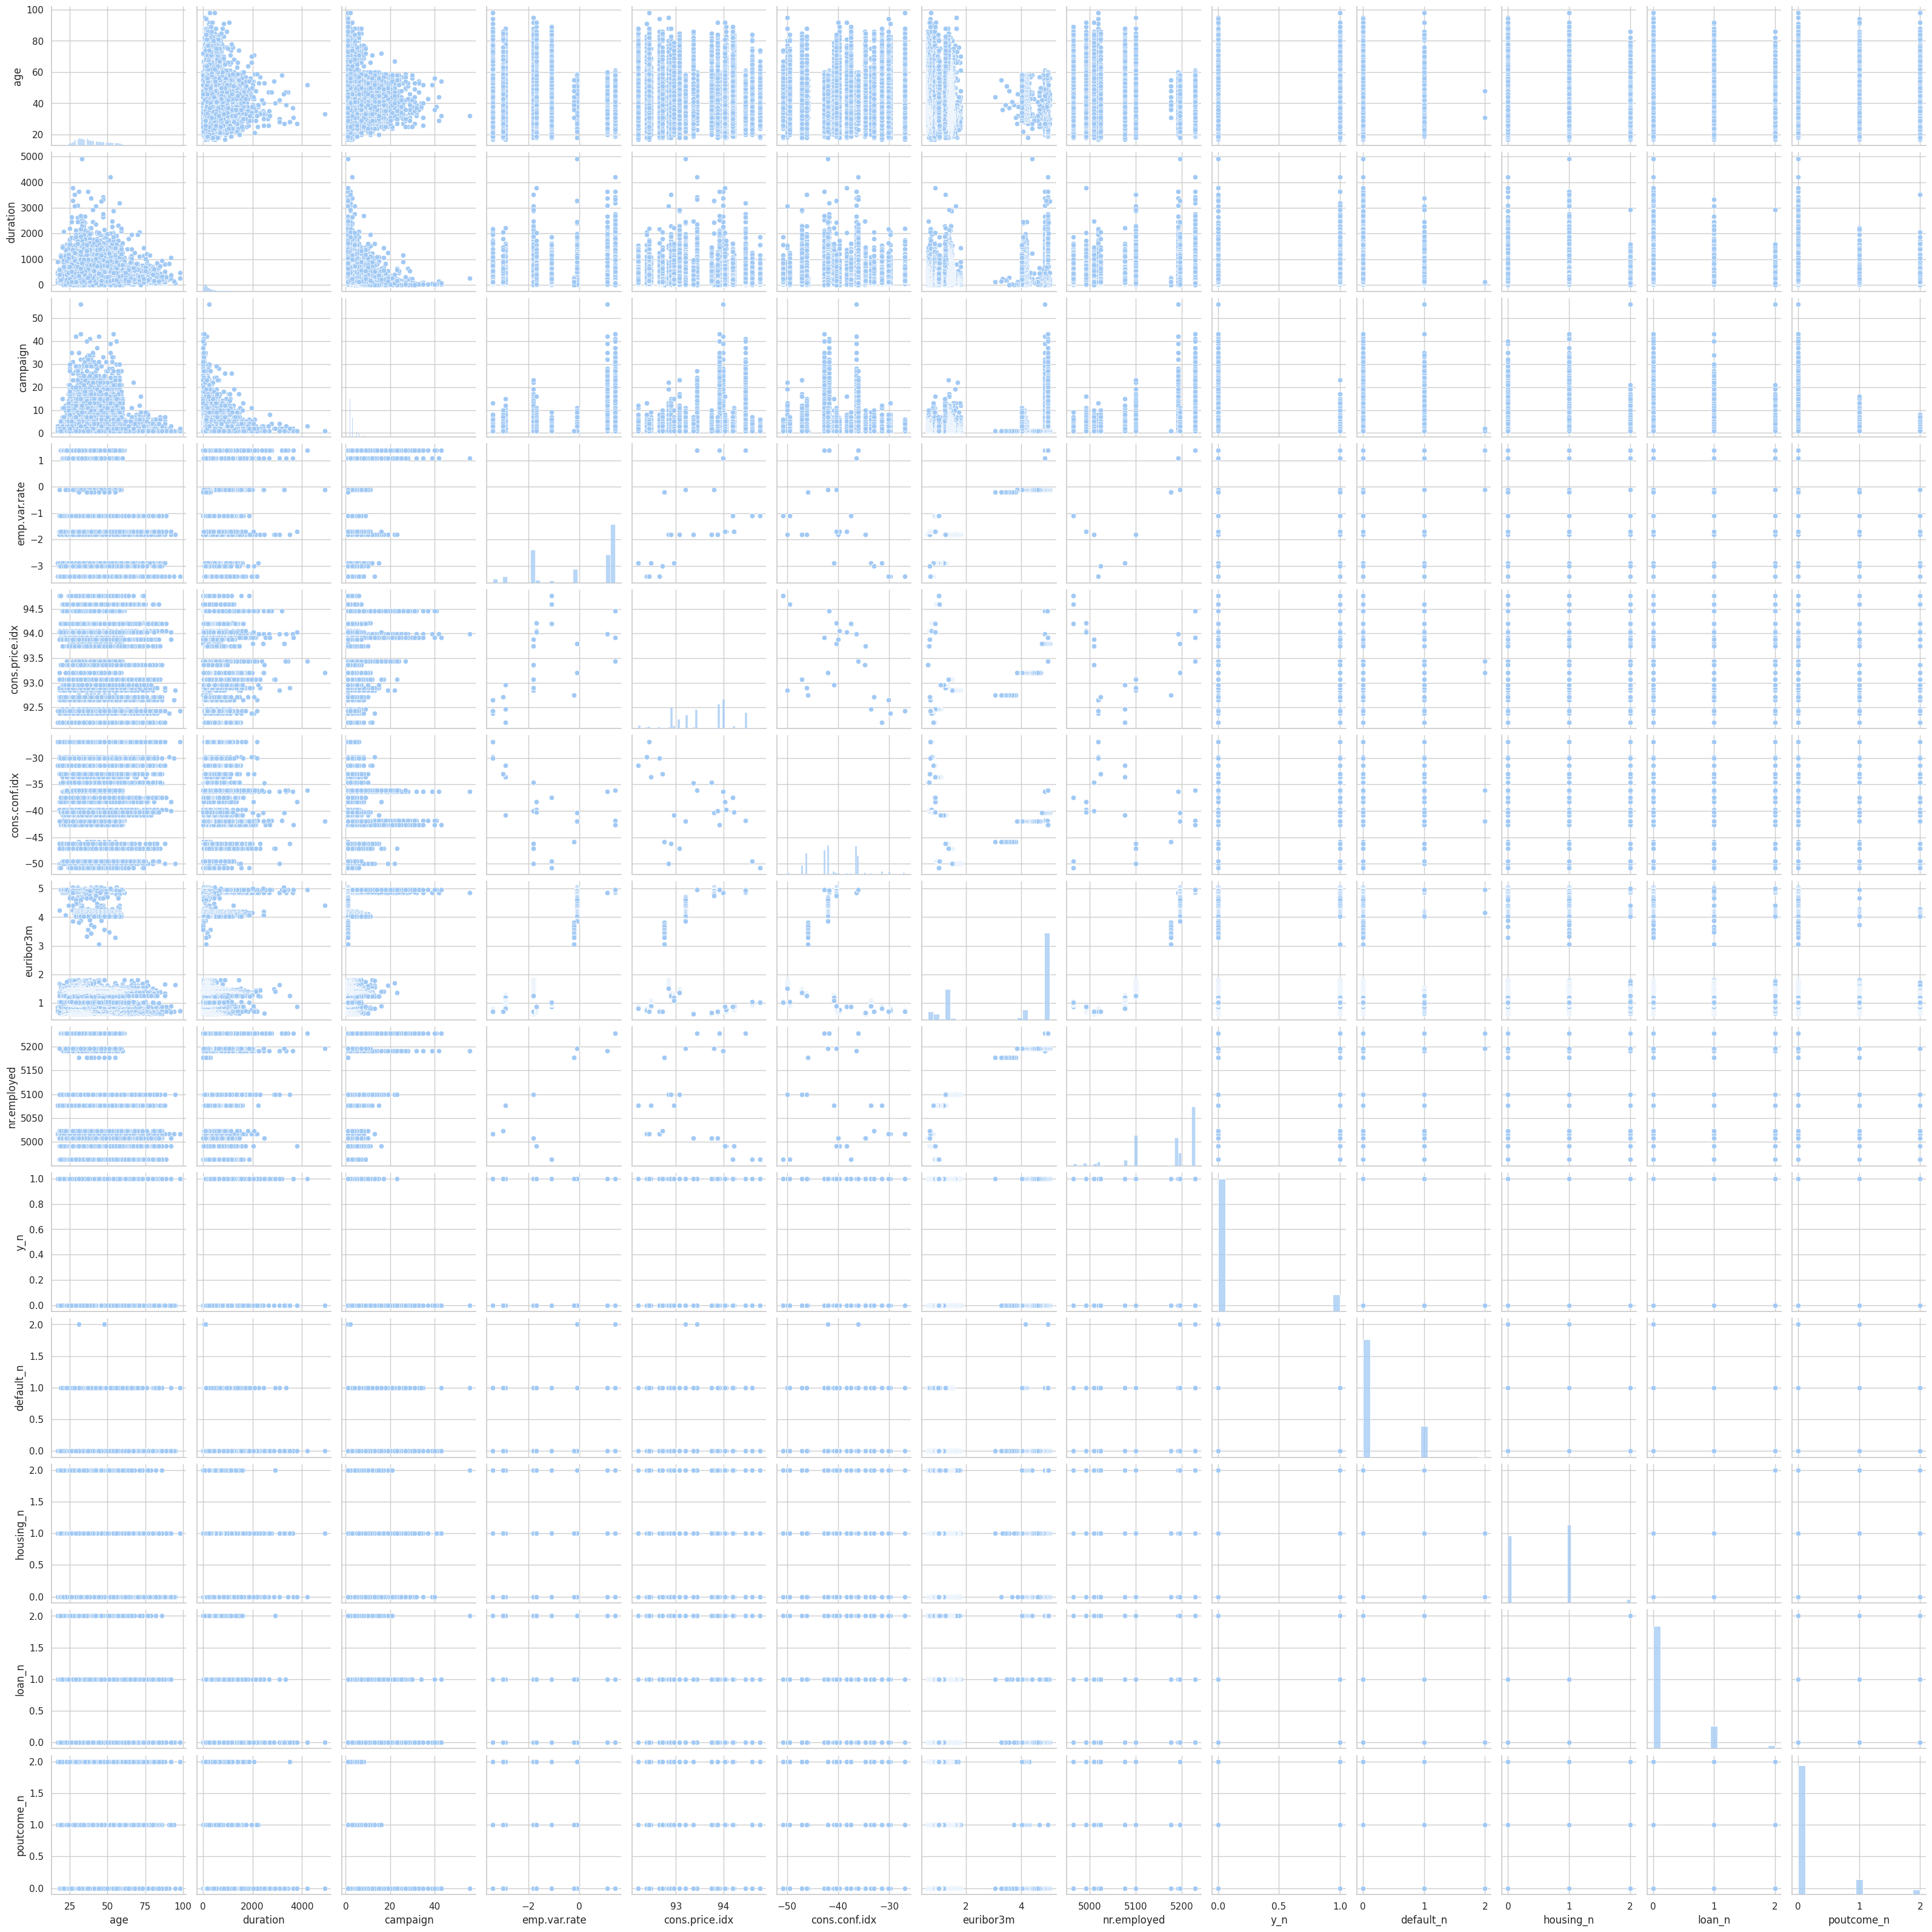

In [26]:
sns.pairplot(data = total_data)

Si bien en este caso no es fácil observar ni explicar los resultador del pairplot, puede servirnos para ver grosso modo algún tipo de variable que nos pueda intreresar para indagar.

In [27]:
total_data.describe()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n,default_n,housing_n,loan_n,poutcome_n
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,0.08,93.58,-40.50,3.62,5167.04,0.11,0.21,0.57,0.20,0.17
std,10.42,259.28,2.77,1.57,0.58,4.63,1.73,72.25,0.32,0.41,0.54,0.46,0.46
min,17.00,0.00,1.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00,0.00,0.00
25%,32.00,102.00,1.00,-1.80,93.08,-42.70,1.34,5099.10,0.00,0.00,0.00,0.00,0.00
50%,38.00,180.00,2.00,1.10,93.75,-41.80,4.86,5191.00,0.00,0.00,1.00,0.00,0.00
75%,47.00,319.00,3.00,1.40,93.99,-36.40,4.96,5228.10,0.00,0.00,1.00,0.00,0.00
max,98.00,4918.00,56.00,1.40,94.77,-26.90,5.04,5228.10,1.00,2.00,2.00,2.00,2.00


# 6. OUTLIERS (VALORES ATÍPICOS)

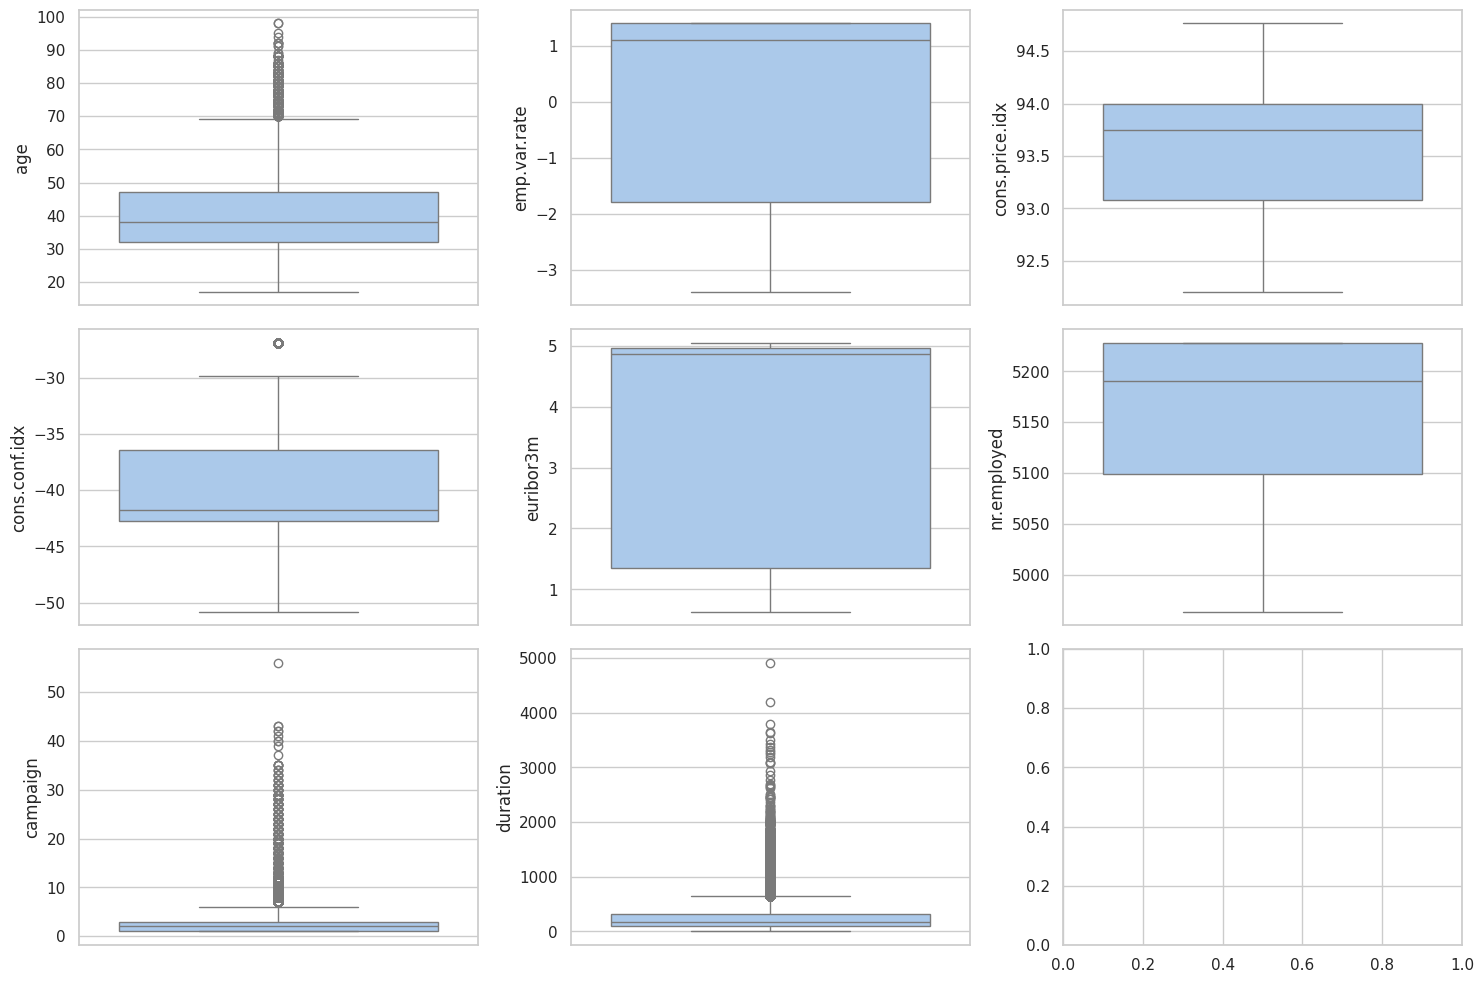

In [28]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "emp.var.rate")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "cons.conf.idx")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "euribor3m")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "nr.employed")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "campaign")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "duration")

plt.tight_layout()

plt.show()


Arriba podemos observar 8 gráficos de tipo "boxplot", o diagramas de caja y bigotes. Estos nos ayudaran posteriormente para eliminar o modificar outliers o variables aleatorias.


De este modo pues, las conclusiones han sido las siguientes:

1. Age: En este caso encontramos los valores dentro de los cuartiles entre 30-50 años, con máximas un poco por debajo (ligeramente por debajo de 20 años) y máximas bastante por encima (hasta los 70 aproximadamente).Aún así, es una variable con bastantes outliers por encima del bigote máximo.

2. Emp.var.rate (employment variation rate): Si bien el bigote inferior está alrededor del -3.5, los cuartiles están muy balanceados, estando el Q3 muy cerca del bigote máximo. No se observan outliers.

3. Cons.price.idx (consumer price index o IPC -> ayuda a analizar inflaciones y deflaciones): si bien los bigotes máximos y mínimos están alejados de la caja "per se", no se encuentran outliers.

4. Cons.cond.idx (índice de confianza del consumidor -> respecto a la economía o finanzas personales): en este gráfico observamos que el bigote máximo roza el -30 y el bigote mínimo el -50 con outliers por encima del valor máximo. En este caso pues podemos decir que la caja se encuentra entre los valores -36 y -43 aproximadamente, diciendonos que, por lo general, el consumidor está en un contexto más bien pesimista/negativo. El outlier, sin embargo, se encuentra en valores más conservadores de confianza al contexto económico. 

5. Euribor3m: No se observan outliers, el valor mínimo si que se encuentra alrededor a 1 punto alejado del Q1, pero el bigote superior está muy cerca del bigote máximo.

6. Nr.employed (número de gente empleada, cuánta gente está actualmente trabajando): en este gráfico no observamos outliers y tampoco observamos el bigote máximo, entendiendo que se encuentra en el Q3. Por otro lado, el bigote mínimo está muy alejado de la media de la caja, que está entre 5100 y 5200, siendo de un valor de alrededor de los 4950 (puede haberse tratado de un momento de crisis o regresión económica). Los datos que comentamos entre 5100 y 5200 indican estabilidad, nivel medio en esta variable.

7. Campaign: Uno de los valores junto a duration con más outliers. Por lo general los datos de éxito de la campaña previa se encuentran en rangos muy bajos, con outliers situados en valores muy altos, entendiend que son las excepciones que supusieron éxito de la campaña, como hemos observado en gráficos previos.

8. Duration: Uno de los valores junto a campaign con más outliers. En este caso era un valor en segundos, por lo que podemos entender que los valores más bajos fueron las llamadas más cortas, siendo las más comunes, y los outliers superiores llamadas más largas (fuera de lo común) pero no por ello significando que fuera más exitosa la campaña por ser la llamada más larga, como hemos observado previamente en comparativas de ambas variables (de hecho la correlación del mapa de calor es de -0.07).

Nota: ¿Cómo eliminar el último a nivel de diseño? 

In [29]:
numerical_columns = [
  "age", 
  "emp.var.rate", 
  "cons.price.idx", 
  "euribor3m", 
  "nr.employed", 
  "campaign",
  "duration"
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.2 y 0, con un rango intercuartílico de 3.2
Los límites superior e inferior para la búsqueda de outliers son 10.39 y 0, con un rango intercuartílico de 3.62
Los límites superior e inferior para la búsqueda de outliers son 644.5 y 0, con un rango intercuartílico de 217.0


In [30]:
total_data[total_data["emp.var.rate"] > lower_limit]

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n,loan_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,41,admin.,married,university.degree,no,yes,no,6,5,nonexistent,1.4,93.44,-36.1,4.96,5228.1,no,0,0,1,0,0
23993,60,admin.,married,university.degree,no,no,no,515,3,nonexistent,1.4,93.44,-36.1,4.96,5228.1,no,0,0,0,0,0
23994,59,retired,married,unknown,no,no,yes,88,2,nonexistent,1.4,93.44,-36.1,4.96,5228.1,no,0,0,0,1,0
23995,58,retired,married,basic.4y,no,yes,yes,89,3,nonexistent,1.4,93.44,-36.1,4.96,5228.1,no,0,0,1,1,0


In [31]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['campaign', 'duration']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'campaign': [1, np.float64(6.0)], 'duration': [0, np.float64(644.5)]}

In [32]:
total_data_CON_outliers

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n,loan_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,383,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,442,1,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,0,0,0


In [33]:
total_data_SIN_outliers

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,default_n,housing_n,loan_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,261.0,1.0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149.0,1.0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,226.0,1.0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,151.0,1.0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307.0,1.0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334.0,1.0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,383.0,1.0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189.0,2.0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no,0,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,442.0,1.0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes,1,0,0,0,0


In [34]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
dtype: int64

In [35]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
dtype: int64

In [36]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
duration          0.0
campaign          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
y_n               0.0
default_n         0.0
housing_n         0.0
loan_n            0.0
poutcome_n        0.0
dtype: float64

En el presente EDA no necesitamos rellenar/reemplazar nulos ya que como podemos observar, tanto en el dataset con outliers como sin outliers no se encuentran valores nulos.

# 7. FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"

Si bien puede usarse una u otra técnica, en nuestros EDA realizaremos ambas para ver cuál encaja mejor en el caso particular a estudiar.

In [37]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "emp.var.rate", "cons.price.idx", "euribor3m", "campaign", "duration", "poutcome_n", "loan_n", "housing_n"]

# Comentario Gina Pedrosa: Ahora SÍ es el turno de la división del conjunto de datos en muestras de train y test: 

X_CON = total_data_CON_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_CON_outliers["y_n"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("y_n", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,age,emp.var.rate,cons.price.idx,euribor3m,campaign,duration,poutcome_n,loan_n,housing_n
12556,40,1.4,93.92,4.96,2,94,0,0,1
35451,31,-1.8,92.89,1.24,4,116,0,0,0
30592,59,-1.8,92.89,1.35,6,13,1,0,0
17914,43,1.4,93.92,4.96,5,94,0,0,1
3315,39,1.1,93.99,4.86,2,344,0,0,0


7.1 NORMALIZACIÓN:

In [38]:
from sklearn.preprocessing import StandardScaler
import pickle

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,age,emp.var.rate,cons.price.idx,euribor3m,campaign,duration,poutcome_n,loan_n,housing_n
12556,-1.67e-03,0.84,0.59,0.77,-0.21,-0.63,-0.37,-0.44,0.79
35451,-8.64e-01,-1.20,-1.18,-1.37,0.51,-0.55,-0.37,-0.44,-1.06
30592,1.82e+00,-1.20,-1.18,-1.31,1.23,-0.94,1.82,-0.44,-1.06
17914,2.86e-01,0.84,0.59,0.77,0.87,-0.63,-0.37,-0.44,0.79
3315,-9.75e-02,0.65,0.72,0.71,-0.21,0.33,-0.37,-0.44,-1.06


7.2 ESCALADO MÍN-MAX:

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,age,emp.var.rate,cons.price.idx,euribor3m,campaign,duration,poutcome_n,loan_n,housing_n
12556,0.28,1.00,0.67,0.98,0.02,1.91e-02,0.0,0.0,0.5
35451,0.17,0.33,0.27,0.14,0.05,2.36e-02,0.0,0.0,0.0
30592,0.52,0.33,0.27,0.16,0.09,2.64e-03,0.5,0.0,0.0
17914,0.32,1.00,0.67,0.98,0.07,1.91e-02,0.0,0.0,0.5
3315,0.27,0.94,0.70,0.96,0.02,6.99e-02,0.0,0.0,0.0


In [40]:

X_train_con_outliers.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-machine-learning-python-template-2/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/ginappedrosa-machine-learning-python-template-2/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/ginappedrosa-machine-learning-python-template-2/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/ginappedrosa-machine-learning-python-template-2/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)


In [56]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

,emp.var.rate,cons.price.idx,euribor3m,duration,poutcome_n
0,1.4,93.92,4.96,94.0,0.0
1,-1.8,92.89,1.24,116.0,0.0
2,-1.8,92.89,1.35,13.0,1.0
3,1.4,93.92,4.96,94.0,0.0
4,1.1,93.99,4.86,344.0,0.0


In [57]:
X_test_con_outliers_sel.head()

,emp.var.rate,cons.price.idx,euribor3m,duration,poutcome_n
0,-1.8,92.89,1.30,371.0,1.0
1,1.1,93.99,4.86,285.0,0.0
2,-1.8,92.89,1.31,52.0,1.0
3,1.4,94.47,4.97,355.0,0.0
4,1.4,93.92,4.96,189.0,0.0


In [58]:
X_train_con_outliers_sel["y_n"] = list(y_train)
X_test_con_outliers_sel["y_n"] = list(y_test)

In [59]:
X_train_con_outliers_sel.to_csv("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/bank_info.csv", index=False)
X_test_con_outliers_sel.to_csv("/workspaces/ginappedrosa-machine-learning-python-template-2/data/processed/bank_info.csv", index=False)

# 8. MODELO DE REGRESIÓN LOGÍSTICA

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = []
for dataset in [
X_train_con_outliers,
X_train_sin_outliers,
X_train_con_outliers_norm,
X_train_sin_outliers_norm,
X_train_con_outliers_scal,
X_train_sin_outliers_scal,
X_train_con_outliers_sel,
]:
  model = LogisticRegression() 
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))

print(results)
max(results)

[0.9004248861911988, 0.896752655538695, 0.9047951441578149, 0.9014871016691958, 0.9041274658573596, 0.9010318664643399, 1.0]


1.0

# 9. OPTIMIZACIÓN DE HIPERPARÁMETROS

Una vez observado que la mejor variable sobre la que trabajar es el dataset: X_train_con_outliers_norm (con valores atípicos + normalizado en el feature engineering), seguimos con la optimización de hiperparámetros del modelo de regresión logística.

9.1 Grid search

In [61]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "dual": [True, False],
    "C": [1.0, 0.5, 0.05, 0.10, 1.5, 2.0]
}

grid = GridSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy")
grid.fit(X_train_con_outliers_sel, y_train)
grid.best_params_

{'C': 1.0, 'dual': False, 'penalty': None}

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = []
for dataset in [
X_train_con_outliers,
X_train_sin_outliers,
X_train_con_outliers_norm,
X_train_sin_outliers_norm,
X_train_con_outliers_scal,
X_train_sin_outliers_scal,
X_train_con_outliers_sel,
]:
  model = LogisticRegression(C= 1.0, dual= False, penalty= None) 
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))

print(results)
max(results)

[0.9004552352048558, 0.8968133535660091, 0.9048558421851289, 0.9015477996965099, 0.9048254931714719, 0.9015477996965099, 1.0]


1.0

9.2 Random search

In [63]:
from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy", n_iter = 20, random_state = 40)
grid.fit(X_train_con_outliers_sel, y_train)
grid.best_params_

{'penalty': None, 'dual': False, 'C': 2.0}

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = []
for dataset in [
X_train_con_outliers,
X_train_sin_outliers,
X_train_con_outliers_norm,
X_train_sin_outliers_norm,
X_train_con_outliers_scal,
X_train_sin_outliers_scal,
X_train_con_outliers_sel,
]:
  model = LogisticRegression(C= 2.0, dual= False, penalty= None) 
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))

print(results)
max(results)

[0.9004552352048558, 0.8968133535660091, 0.9048558421851289, 0.9015477996965099, 0.9048254931714719, 0.9015477996965099, 1.0]


1.0